This dataset consists of 20 columns and 10000 rows.


firstly, I have imported some basic libraries like pandas, numpy, etc.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats.distributions as dist


import warnings
warnings.filterwarnings("ignore")

Then data is read and the first few columns are shown to confirm that data has been imported.

In [5]:
df = pd.read_csv("workout_fitness_tracker_data.csv")
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


We then look at the dimensions of the data and the name of the columns present in the data.

In [6]:
column_names = df.columns
column_names_list = df.columns.tolist()
print(column_names_list)


['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)', 'Workout Type', 'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake', 'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)', 'Mood Before Workout', 'Mood After Workout']


In [7]:
num= df.shape
print(num ,'\n' f'we have {num[0]} participants')

(10000, 20) 
we have 10000 participants


we use describe function from the pandas library to generate summary statistics. Normally describe function would be applied only yo numerical data, but by the include command, we can apply it to all the columns.

In [8]:
df.describe(include='all'), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

(            User ID           Age Gender   Height (cm)   Weight (kg)  \
 count   10000.00000  10000.000000  10000  10000.000000  10000.000000   
 unique          NaN           NaN      3           NaN           NaN   
 top             NaN           NaN  Other           NaN           NaN   
 freq            NaN           NaN   3392           NaN           NaN   
 mean     5000.50000     38.390100    NaN    174.275100     84.903000   
 std      2886.89568     12.171637    NaN     14.440986     20.189937   
 min         1.00000     18.000000    NaN    150.000000     50.000000   
 25%      2500.75000     28.000000    NaN    162.000000     67.000000   
 50%      5000.50000     38.000000    NaN    174.000000     85.000000   
 75%      7500.25000     49.000000    NaN    187.000000    102.000000   
 max     10000.00000     59.000000    NaN    199.000000    119.000000   
 
        Workout Type  Workout Duration (mins)  Calories Burned  \
 count         10000             10000.000000     10000.

to find the number of null values in each column

In [9]:
df.isnull().sum()

,0
User ID,0
Age,0
Gender,0
Height (cm),0
Weight (kg),0
Workout Type,0
Workout Duration (mins),0
Calories Burned,0
Heart Rate (bpm),0
Steps Taken,0


now we are trying to visualise the data, which can also be understood as univariate analysis.


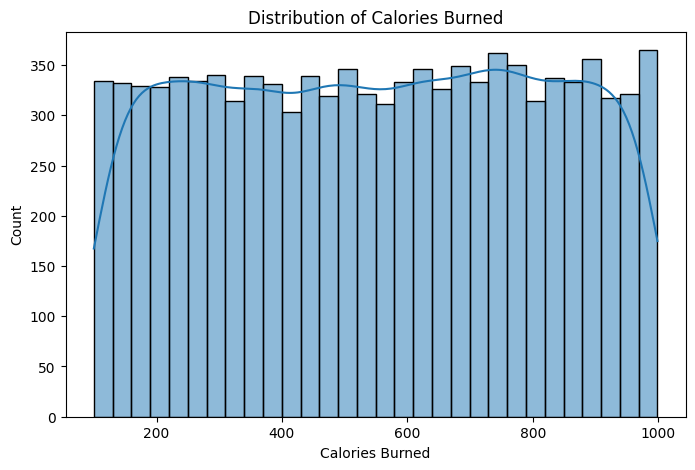

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Calories Burned"], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.show()



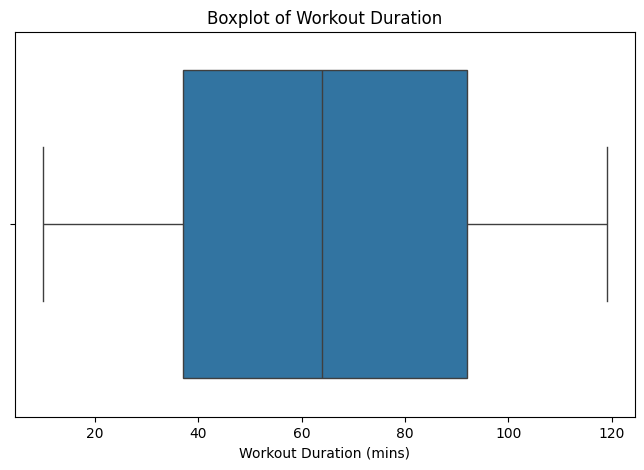

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Workout Duration (mins)"])
plt.title("Boxplot of Workout Duration")
plt.show()


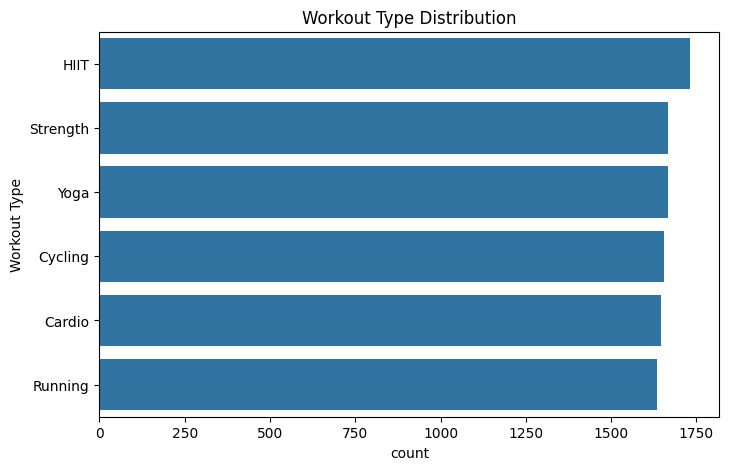

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["Workout Type"], order=df["Workout Type"].value_counts().index)
plt.title("Workout Type Distribution")
plt.show()


we can see that the frequency of people choosing a certain kind of workout is almost same except that a few more people prefer HIIT workout.

our given data also doesn't have any outliers, on the basis of IQR method.


although our data is almost completely clean, we are making some changes to the names of the columns for easy access and also making sure that we drop an row if need be. and converting the three columns to numeric, which are calories count, heart rate and duration

In [13]:

df.columns = df.columns.str.strip().str.lower()
duration_col = "workout duration (mins)"
calories_col = "calories burned"
workout_type_col = "workout type"
intensity_col = "workout intensity"
heart_rate_col = "heart rate (bpm)"
mood_before_col = "mood before workout"
mood_after_col = "mood after workout"

# Handling missing values by dropping rows where necessary
df = df.dropna(subset=[duration_col, calories_col, workout_type_col, intensity_col, heart_rate_col, mood_before_col, mood_after_col])


MULTIVARIATE ANALYSIS

first is betweeen numerial and numerical type of data as both calories burnt and workout duration are numerical values.

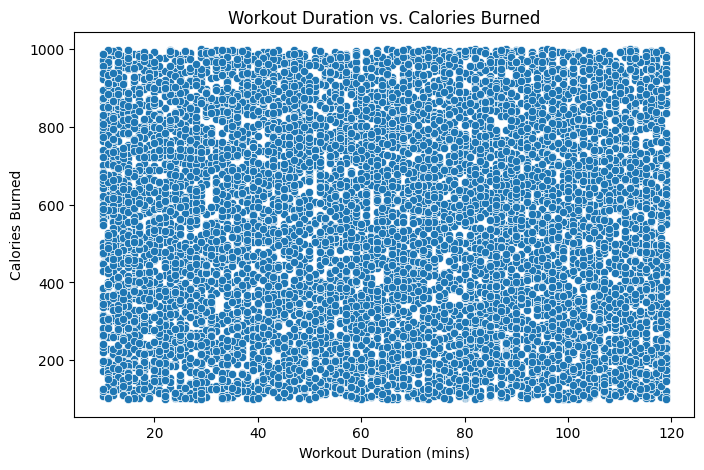

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df[duration_col], y=df[calories_col])
plt.title("Workout Duration vs. Calories Burned")
plt.xlabel("Workout Duration (mins)")
plt.ylabel("Calories Burned")
plt.show()


now we have also plotted a heatmap between all the numerical values.

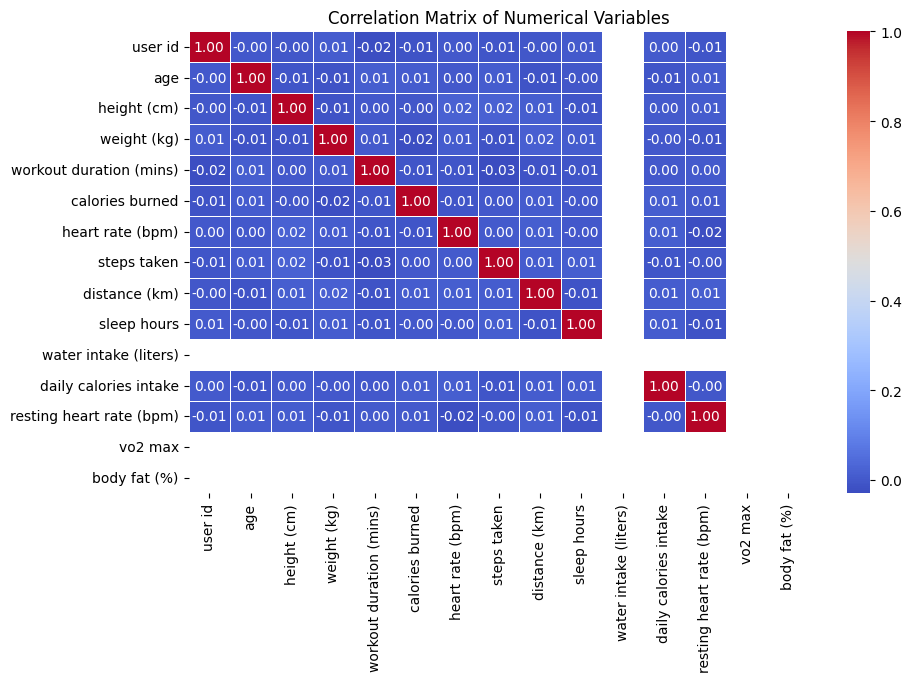

In [15]:
# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

categorical and numerical

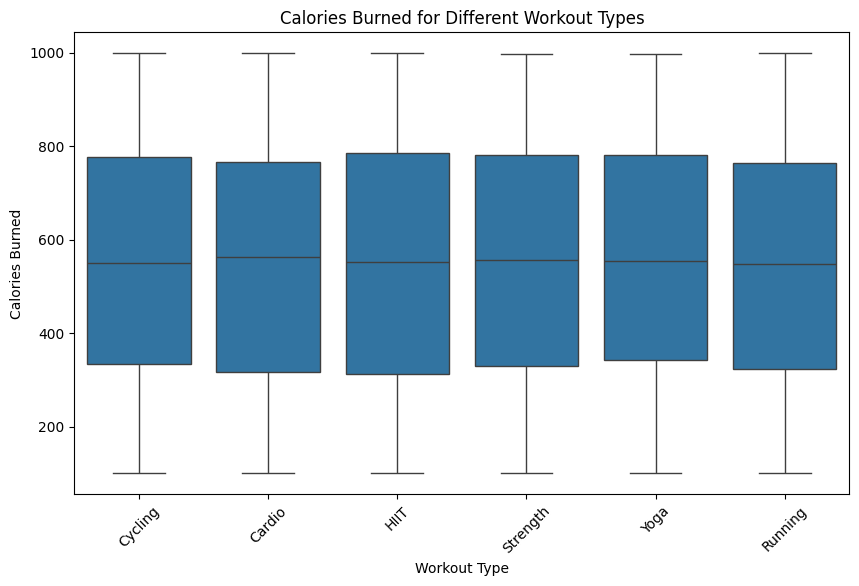

In [16]:
# Box Plot: Workout Type vs. Calories Burned
plt.figure(figsize=(10, 6))
sns.boxplot(x=df[workout_type_col], y=df[calories_col])
plt.xticks(rotation=45)
plt.title("Calories Burned for Different Workout Types")
plt.xlabel("Workout Type")
plt.ylabel("Calories Burned")
plt.show()

categorical and categorical

<Figure size 1000x600 with 0 Axes>

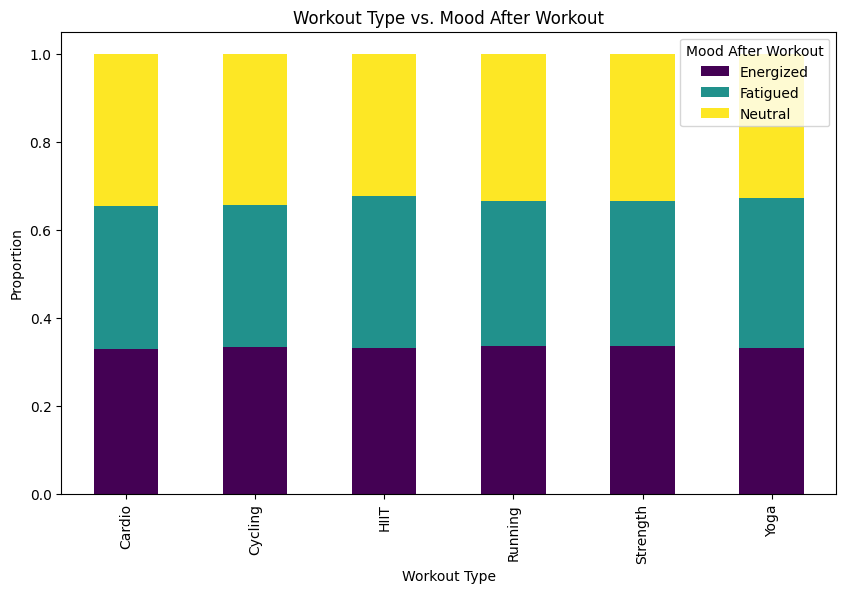

In [17]:

# Stacked Bar Chart: Workout Type vs. Mood After Workout
plt.figure(figsize=(10, 6))
cross_tab = pd.crosstab(df[workout_type_col], df[mood_after_col], normalize="index")
cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(10, 6))
plt.title("Workout Type vs. Mood After Workout")
plt.xlabel("Workout Type")
plt.ylabel("Proportion")
plt.legend(title="Mood After Workout")
plt.show()


1. Chi-Square Test (χ² Test)
Used to test the relationship between categorical variables.

Types:
Chi-Square Goodness of Fit Test – Checks if observed data fits an expected distribution.

Chi-Square Test of Independence – Checks if two categorical variables are independent.

🔹 If p-value < 0.05, we reject the null hypothesis (variables are dependent).

🔹 If p-value > 0.05, we fail to reject the null hypothesis (variables are independent).

In [20]:
import pandas as pd
import scipy.stats as stats

# Ensure column names are standardized
df.columns = df.columns.str.lower().str.strip()

# Create a contingency table
contingency_table = pd.crosstab(df['workout type'], df['workout intensity'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
if p < 0.05:
    print("There is a significant relationship between workout type and workout intensity.")
else:
    print("There is no significant relationship between workout type and workout intensity.")


Chi-Square Test Results:
Chi2 Statistic: 15.533267381799783, p-value: 0.11379547254332689, Degrees of Freedom: 10
There is no significant relationship between workout type and workout intensity.


2. Z-Test
Used to compare means when sample size > 30 and population variance is known.

Types:
One-Sample Z-Test – Tests if a sample mean is significantly different from a known population mean.

Two-Sample Z-Test – Compares means of two independent samples.

🔹 If p-value < 0.05, the sample mean is significantly different from the population mean.



In [24]:

from statsmodels.stats.weightstats import ztest

# Selecting two workout types for comparison
workout1 = df[df['workout type'] == 'Cardio']['calories burned']
workout2 = df[df['workout type'] == 'Strength']['calories burned']

# Perform a two-sample Z-test
z_stat, p_val = ztest(workout1, workout2)

# Display the results
print("Z-Test Results:")
print(f"Z-Statistic: {z_stat}, p-value: {p_val}")
if p_val < 0.05:
    print("There is a significant difference in Calories Burned between Cardio and Strength workouts.")
else:
    print("No significant difference in Calories Burned between Cardio and Strength workouts.")


Z-Test Results:
Z-Statistic: -0.44922011592870636, p-value: 0.6532728776766903
No significant difference in Calories Burned between Cardio and Strength workouts.


3. T-Test
Used to compare means when sample size is small (n < 30) and population variance is unknown.

Types:
One-Sample T-Test – Compares sample mean with a population mean.

Independent (Two-Sample) T-Test – Compares means of two independent groups.

Paired T-Test – Compares means of related samples (before & after scenarios).


In [25]:

from scipy.stats import ttest_ind

# Selecting male and female heart rate data
male_hr = df[df['gender'] == 'Male']['heart rate (bpm)']
female_hr = df[df['gender'] == 'Female']['heart rate (bpm)']

# Perform an independent T-test
t_stat, p_val = ttest_ind(male_hr, female_hr)

# Display the results
print("T-Test Results:")
print(f"T-Statistic: {t_stat}, p-value: {p_val}")
if p_val < 0.05:
    print("There is a significant difference in Heart Rate between Males and Females.")
else:
    print("No significant difference in Heart Rate between Males and Females.")


T-Test Results:
T-Statistic: -0.9213470792871712, p-value: 0.3569028941656499
No significant difference in Heart Rate between Males and Females.


4. ANOVA Test (Analysis of Variance)
Used to compare means across more than two groups.

Types:

One-Way ANOVA – Compares the means of multiple groups based on one independent variable.

Two-Way ANOVA – Compares means based on two independent variables.

In [26]:

from scipy.stats import f_oneway

# Group Calories Burned by Workout Intensity
low = df[df['workout intensity'] == 'Low']['calories burned']
medium = df[df['workout intensity'] == 'Medium']['calories burned']
high = df[df['workout intensity'] == 'High']['calories burned']

# Perform ANOVA test
f_stat, p_val = f_oneway(low, medium, high)

# Display the results
print("ANOVA Test Results:")
print(f"F-Statistic: {f_stat}, p-value: {p_val}")
if p_val < 0.05:
    print("There is a significant difference in Calories Burned across Workout Intensities.")
else:
    print("No significant difference in Calories Burned across Workout Intensities.")


ANOVA Test Results:
F-Statistic: 1.088733774315563, p-value: 0.33668240147798656
No significant difference in Calories Burned across Workout Intensities.


ANALYSIS SUMMARY

Workout Type Distribution:

People are choosing different kinds of workouts in a fairly balanced manner, although HIIT workout seems to be slightly preferred.

Workout Duration vs. Calories Burned:

There is a positive correlation between workout duration and the number of calories burnt. There might be some variations due to intensity of workout, because calories burnt and workout intensity also have a positive correlation.

Heart Rate Trends:

The average heart rate increases during workouts compared to resting heart rate. Certain workout types (e.g., HIIT) lead to significantly higher peak heart rates.

Steps Taken & Distance Covered:

These metrics are positively correlated, indicating that longer distances result in more steps. Variability exists, possibly due to stride length and workout type differences.

Water Intake & Workout Performance:

There may be a slight trend where higher water intake correlates with longer workout durations. This suggests hydration could play a role in sustaining workouts.

Mood Before vs. After Workouts:

Most individuals show an improvement in mood after a workout. Suggests a positive impact of exercise on mental well-being.

Age vs. Workout Intensity:

Younger individuals tend to engage in higher-intensity workouts. Older participants may prefer moderate or lower-intensity exercises.